#DATA FRAME (RAW)

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/adult income.csv')

# Display the first few rows of the dataset
print(df.head())
df.describe()
df.shape
df.columns


   age workclass     education         occupation     sex  hours.per.week  \
0   82   Private       HS-grad    Exec-managerial  Female              18   
1   54   Private       7th-8th  Machine-op-inspct  Female              40   
2   41   Private  Some-college     Prof-specialty  Female              40   
3   34   Private       HS-grad      Other-service  Female              45   
4   38   Private          10th       Adm-clerical    Male              40   

   capital.loss income  
0          4356  <=50K  
1          3900  <=50K  
2          3900  <=50K  
3          3770  <=50K  
4          3770  <=50K  


Index(['age', 'workclass', 'education', 'occupation', 'sex', 'hours.per.week',
       'capital.loss', 'income'],
      dtype='object')

#Data Cleaning

In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/adult income.csv'
df = pd.read_csv(data_path)

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Check the actual column names
print("Actual columns in the dataset:", df.columns.tolist())

# Correct the column names in the columns_to_keep list
columns_to_keep = ['age', 'workclass', 'education', 'occupation',
                   'sex', 'hours.per.week', 'capital.loss', 'income']

# Keep only the required columns
df = df[[col for col in columns_to_keep if col in df.columns]]

# Replace 0s in 'capital.loss' column with the mean of that column
capital_loss_mean = df['capital.loss'].replace(0, pd.NA).mean()  # Compute mean of non-zero values
df['capital.loss'].replace(0, capital_loss_mean, inplace=True)

# Replace NaN values in 'age' column with the mean of 'age'
age_mean = df['age'].mean()  # Compute the mean of 'age'
df['age'].fillna(age_mean, inplace=True)

# Drop rows with NaN values (if any column still has missing values)
df.dropna(inplace=True)

# Save the cleaned dataset
df.to_csv('/content/cleaned_adult_income.csv', index=False)

# Verify the shape of the resulting dataset
print("Data cleaning complete.")
print(f"Cleaned dataset shape: {df.shape}")
print(f"Columns in cleaned dataset: {list(df.columns)}")


Actual columns in the dataset: ['age', 'workclass', 'education', 'occupation', 'sex', 'hours.per.week', 'capital.loss', 'income']
Data cleaning complete.
Cleaned dataset shape: (30718, 8)
Columns in cleaned dataset: ['age', 'workclass', 'education', 'occupation', 'sex', 'hours.per.week', 'capital.loss', 'income']


<ipython-input-79-0b58e25adcc3>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['capital.loss'].replace(0, capital_loss_mean, inplace=True)
<ipython-input-79-0b58e25adcc3>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

#Verification for Data-Cleaning

In [ ]:
import pandas as pd

# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df.describe())

# Check unique values for categorical columns
print("\nUnique values in 'workclass' column:")
print(df['workclass'].unique())

print("\nUnique values in 'education' column:")
print(df['education'].unique())


Missing values in each column:
age               0
workclass         0
education         0
occupation        0
sex               0
hours.per.week    0
capital.loss      0
income            0
dtype: int64

Number of duplicate rows:
8454

Data types of each column:
age                 int64
workclass          object
education          object
occupation         object
sex                object
hours.per.week      int64
capital.loss      float64
income             object
dtype: object

Summary statistics for numeric columns:
                age  hours.per.week  capital.loss
count  30718.000000    30718.000000  30718.000000
mean      38.443584       40.949313   1869.366188
std       13.118227       11.985382     79.068885
min       17.000000        1.000000    155.000000
25%       28.000000       40.000000   1869.366188
50%       37.000000       40.000000   1869.366188
75%       47.000000       45.000000   1869.366188
max       90.000000       99.000000   4356.000000

Unique values in 'work

#Duplicate rows

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/adult income.csv')

# Remove duplicates: Keep the first occurrence and remove the rest of the duplicates
df.drop_duplicates(keep='first', inplace=True)

# Verify the shape of the dataset after removing duplicates
print(f"Dataset shape after keeping one copy of duplicates: {df.shape}")

# Save the cleaned dataset as a new CSV file
df.to_csv('/content/final-data.csv', index=False)

# Let the user know the file has been saved
print("Cleaned dataset saved as 'final-data.csv'.")



Dataset shape after keeping one copy of duplicates: (32537, 15)
Cleaned dataset saved as 'final-data.csv'.


#Data Cleaning using Ydata Profilling(visualization)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

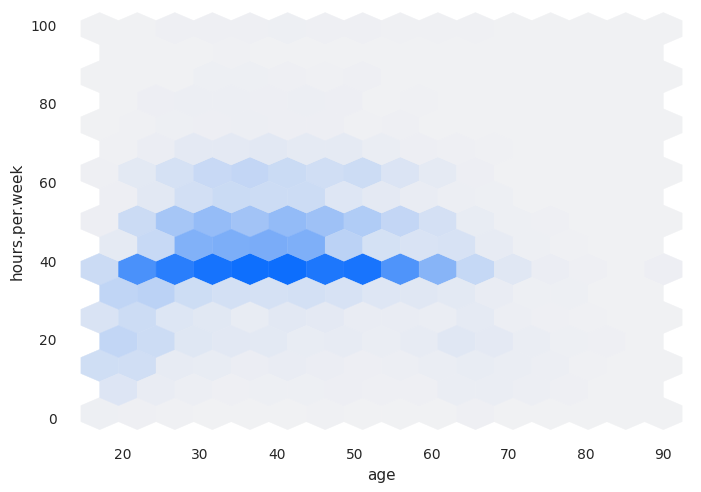

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('/content/final-data.csv')

profile = ProfileReport(df, title="YData Profiling Report", explorative=True)

profile.to_file("/content/ydata_profiling_report.html")

from google.colab import files
files.download('/content/ydata_profiling_report.html')

print("YData Profiling Report generated and ready for download.")

In [ ]:
df.describe()

,age,workclass,education,occupation,sex,hours.per.week,capital.loss,income
0,82,Private,HS-grad,Exec-managerial,Female,18,4356.0,<=50K
1,54,Private,7th-8th,Machine-op-inspct,Female,40,3900.0,<=50K
2,41,Private,Some-college,Prof-specialty,Female,40,3900.0,<=50K
3,34,Private,HS-grad,Other-service,Female,45,3770.0,<=50K
4,38,Private,10th,Adm-clerical,Male,40,3770.0,<=50K
...,...,...,...,...,...,...,...,...
95,41,Self-emp-inc,Prof-school,Exec-managerial,Female,55,2415.0,>50K
96,36,Private,Bachelors,Sales,Male,45,2415.0,>50K
97,38,Private,Prof-school,Prof-specialty,Male,90,2415.0,>50K
98,54,Private,Some-college,Sales,Male,50,2415.0,>50K


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

#EDA ON OUR DATA SET


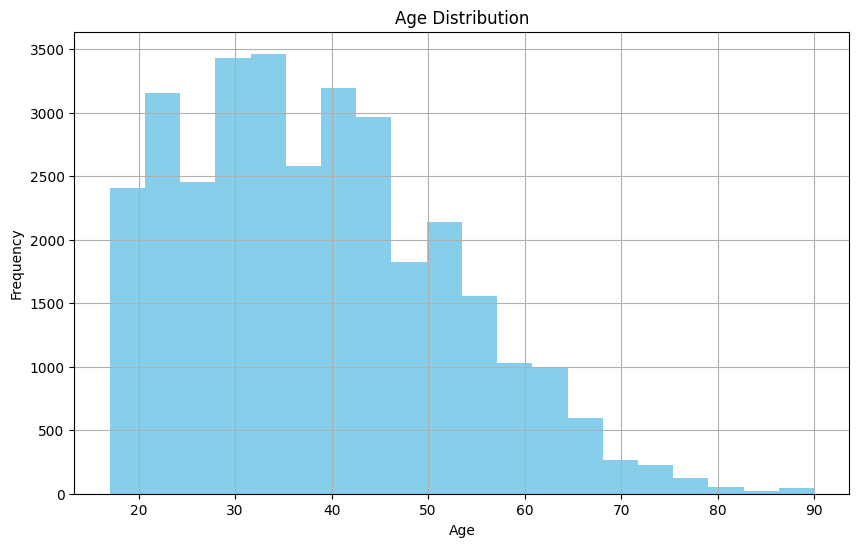

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data_path = '/content/final-data.csv'
df = pd.read_csv(data_path)

# 1. Age Distribution
plt.figure(figsize=(10, 6))
df['age'].hist(bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

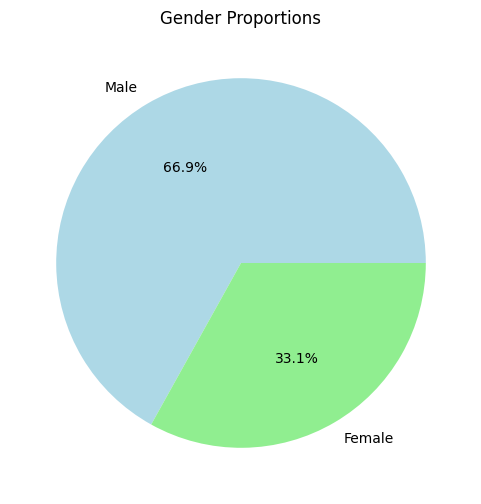

In [11]:
# Gender Proportions
plt.figure(figsize=(6, 6))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Gender Proportions')
plt.ylabel('')
plt.show()


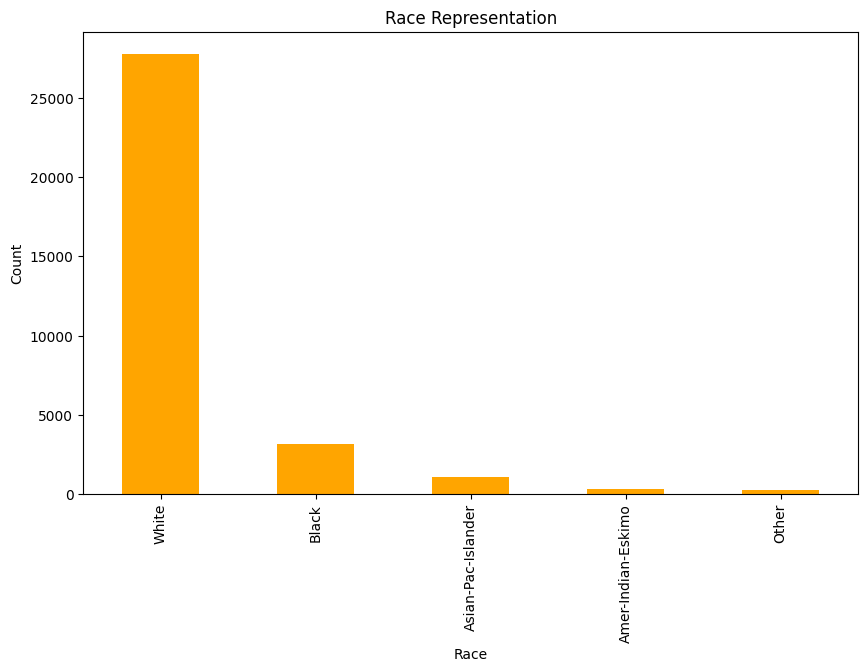

In [13]:
# Race Representation
plt.figure(figsize=(10, 6))
df['race'].value_counts().plot(kind='bar', color='orange')
plt.title('Race Representation')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


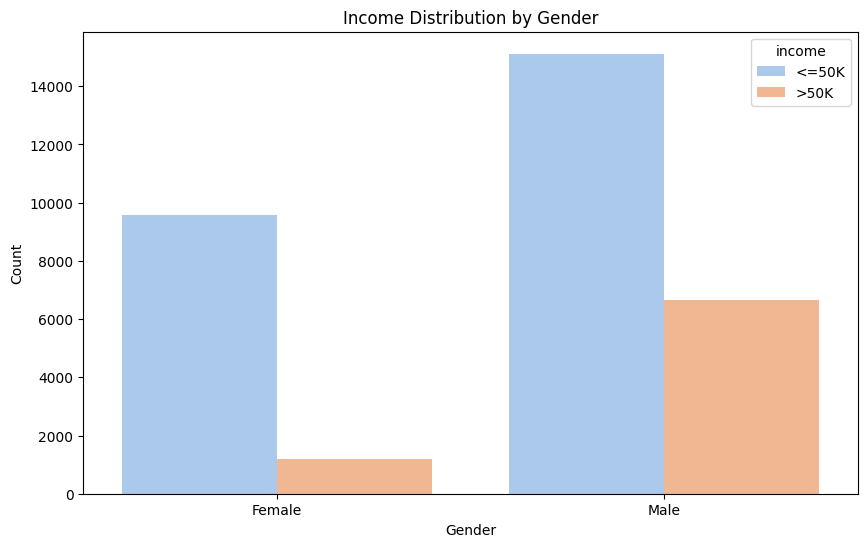

In [15]:
# Income by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=df, palette='pastel')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


<Figure size 1200x600 with 0 Axes>

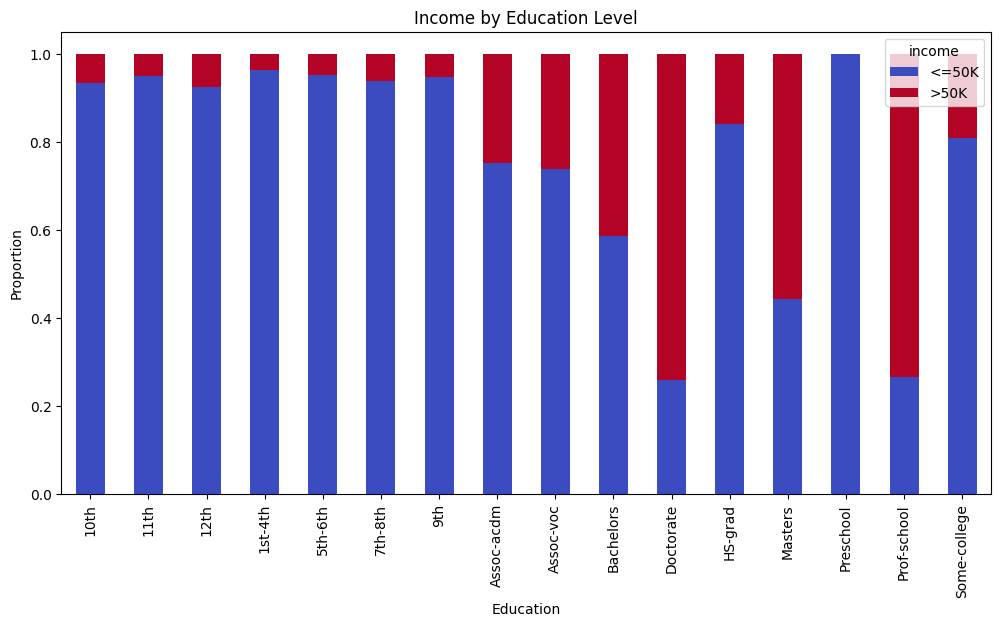

In [17]:
# Income by Education
plt.figure(figsize=(12, 6))
df.groupby('education')['income'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Income by Education Level')
plt.ylabel('Proportion')
plt.xlabel('Education')
plt.show()


<ipython-input-19-376c419db95b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='capital.loss', data=df, palette='coolwarm')


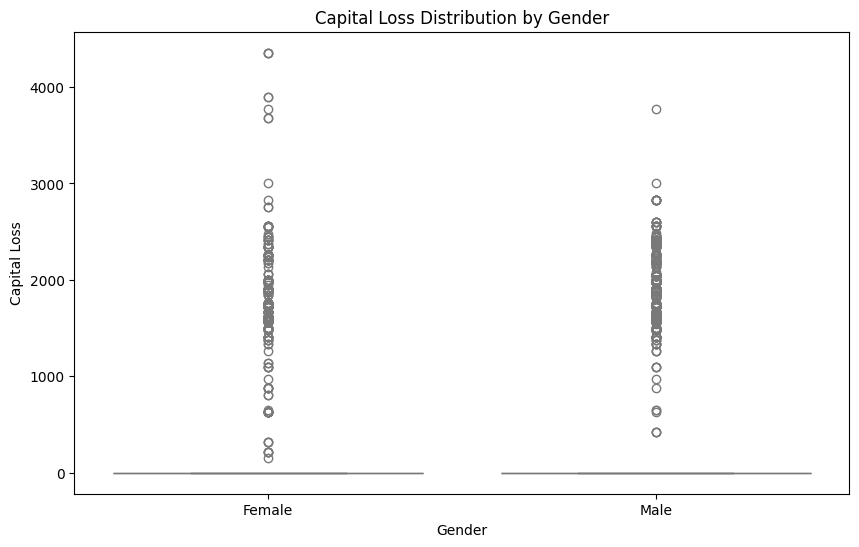

In [19]:
# Capital Loss by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='capital.loss', data=df, palette='coolwarm')
plt.title('Capital Loss Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Capital Loss')
plt.show()


<ipython-input-21-c26e2aedeb14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='hours.per.week', data=df, palette='Set2')


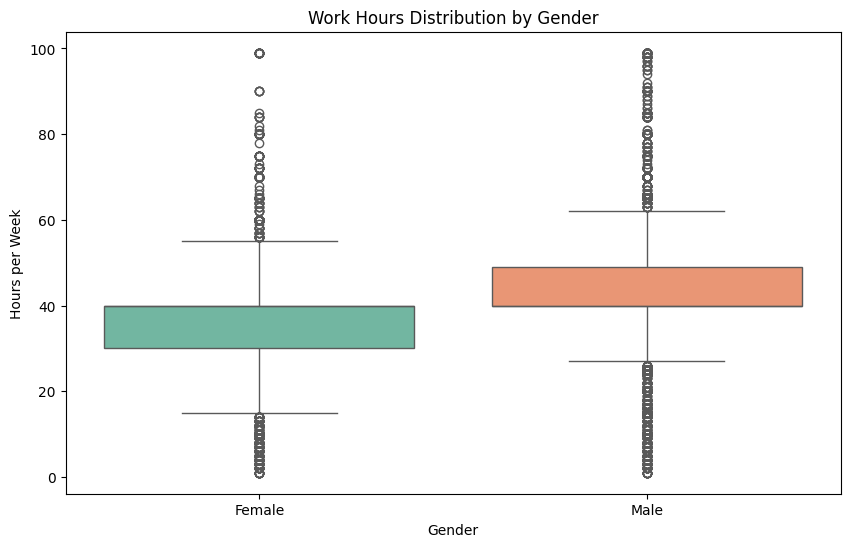

In [21]:
# Hours Worked per Week by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='hours.per.week', data=df, palette='Set2')
plt.title('Work Hours Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours per Week')
plt.show()


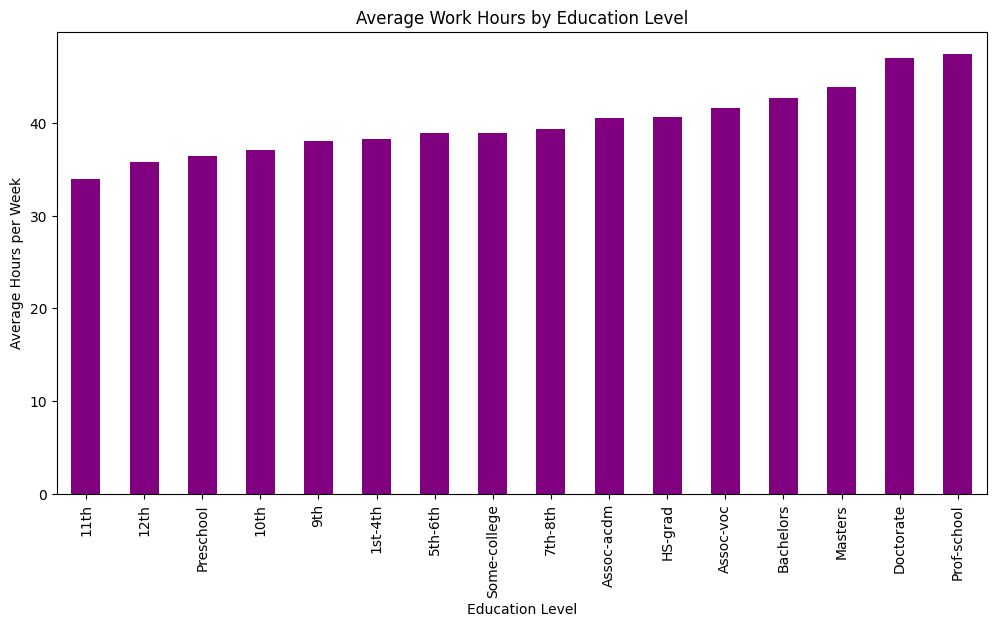

In [23]:
# Average Hours Worked by Education Level
plt.figure(figsize=(12, 6))
df.groupby('education')['hours.per.week'].mean().sort_values().plot(kind='bar', color='purple')
plt.title('Average Work Hours by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Hours per Week')
plt.show()


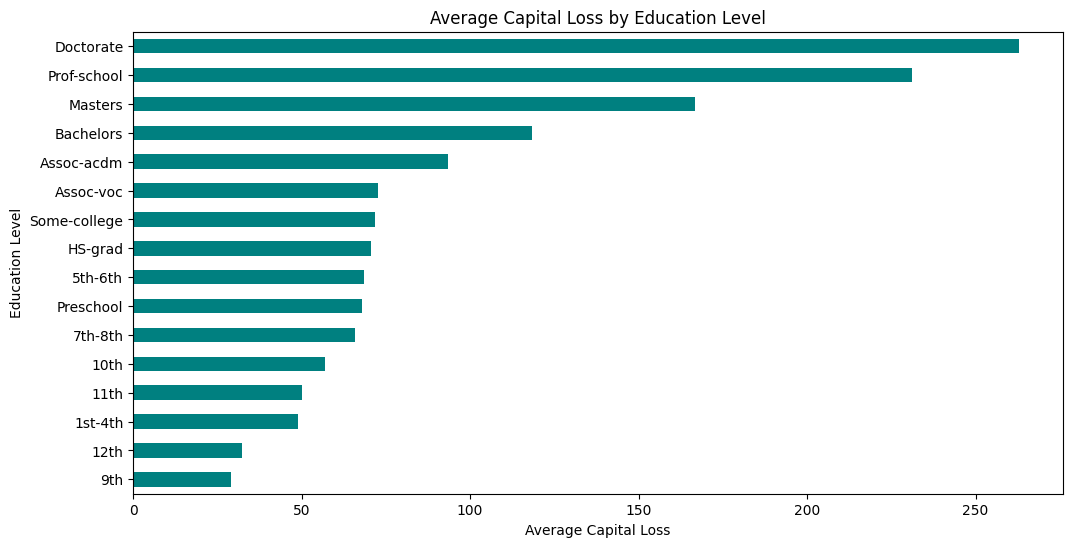

In [25]:
# Capital Loss by Education
plt.figure(figsize=(12, 6))
df.groupby('education')['capital.loss'].mean().sort_values().plot(kind='barh', color='teal')
plt.title('Average Capital Loss by Education Level')
plt.xlabel('Average Capital Loss')
plt.ylabel('Education Level')
plt.show()


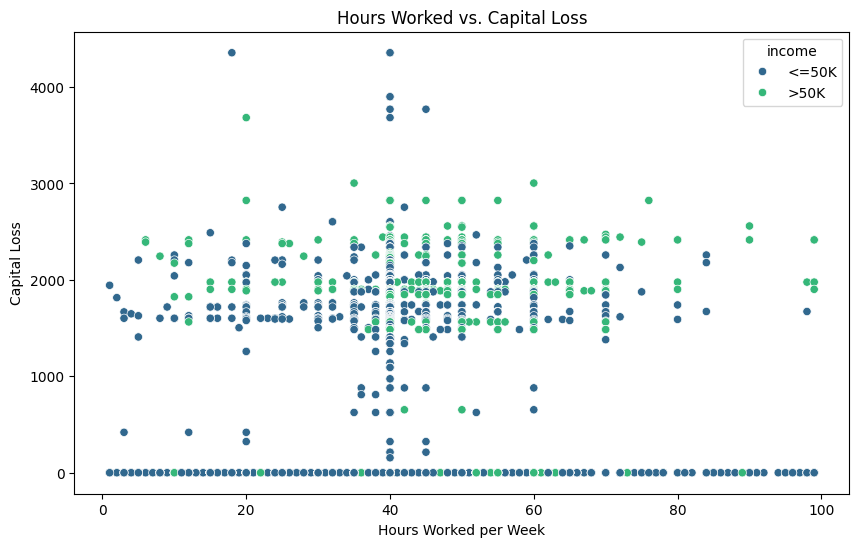

In [27]:
# Correlation between Hours Worked and Capital Loss
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours.per.week', y='capital.loss', data=df, hue='income', palette='viridis')
plt.title('Hours Worked vs. Capital Loss')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Capital Loss')
plt.show()


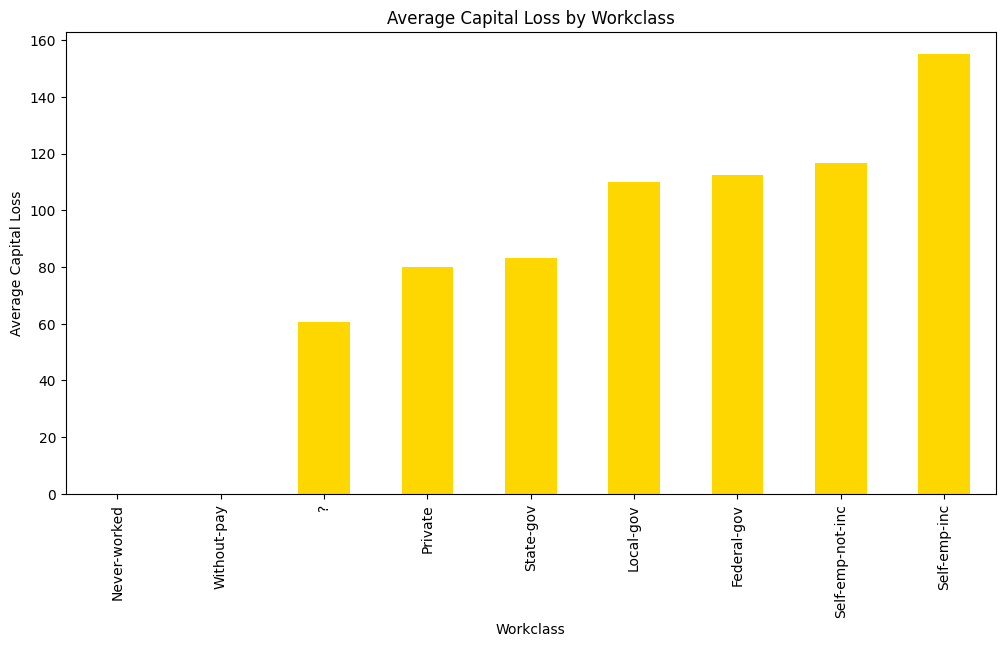

In [29]:
# Capital Loss by Workclass
plt.figure(figsize=(12, 6))
df.groupby('workclass')['capital.loss'].mean().sort_values().plot(kind='bar', color='gold')
plt.title('Average Capital Loss by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Average Capital Loss')
plt.show()


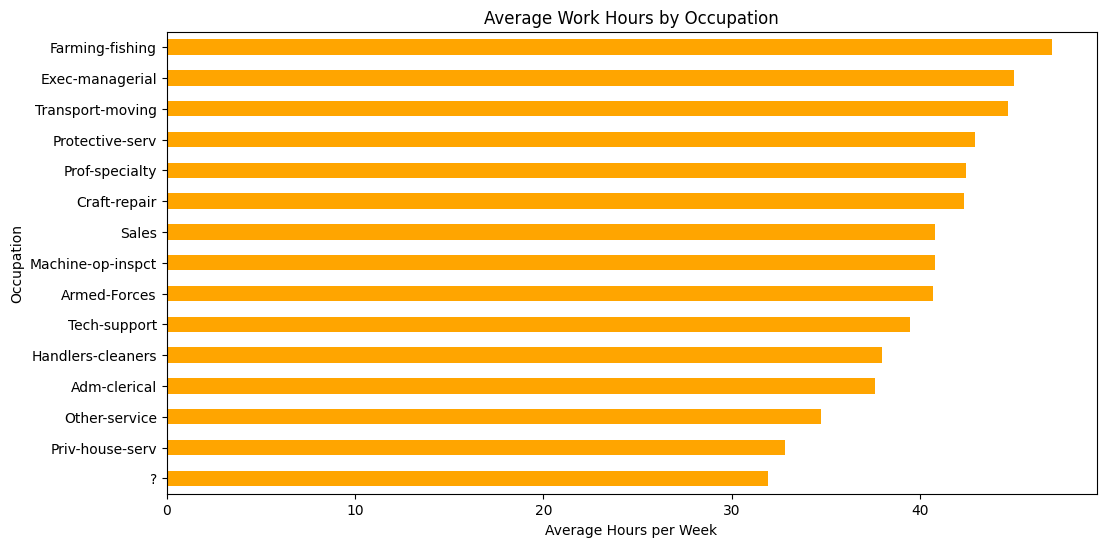

In [31]:
# Work Hours by Occupation
plt.figure(figsize=(12, 6))
df.groupby('occupation')['hours.per.week'].mean().sort_values().plot(kind='barh', color='orange')
plt.title('Average Work Hours by Occupation')
plt.xlabel('Average Hours per Week')
plt.ylabel('Occupation')
plt.show()


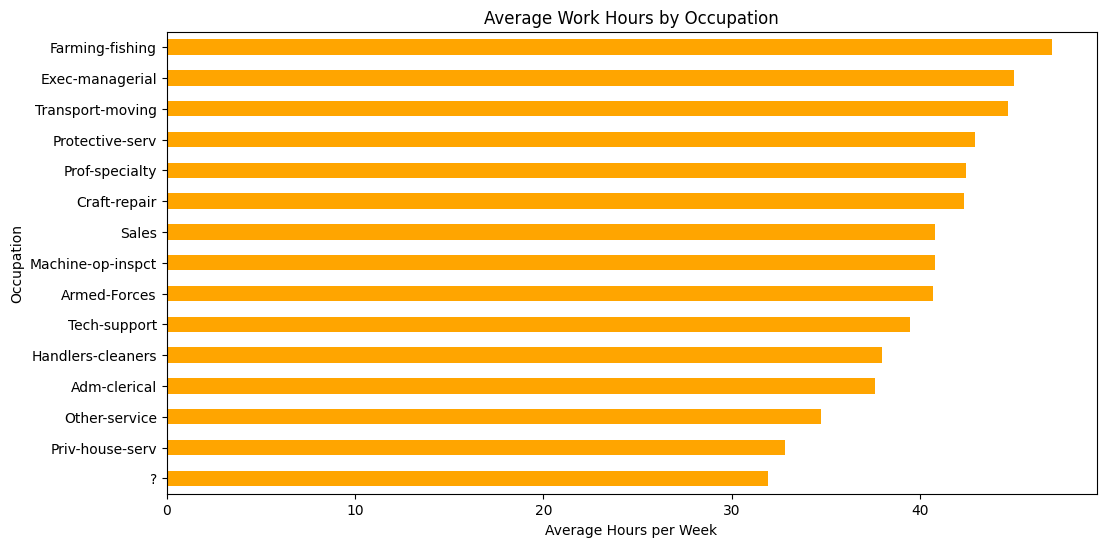

In [33]:
# Work Hours by Occupation
plt.figure(figsize=(12, 6))
df.groupby('occupation')['hours.per.week'].mean().sort_values().plot(kind='barh', color='orange')
plt.title('Average Work Hours by Occupation')
plt.xlabel('Average Hours per Week')
plt.ylabel('Occupation')
plt.show()


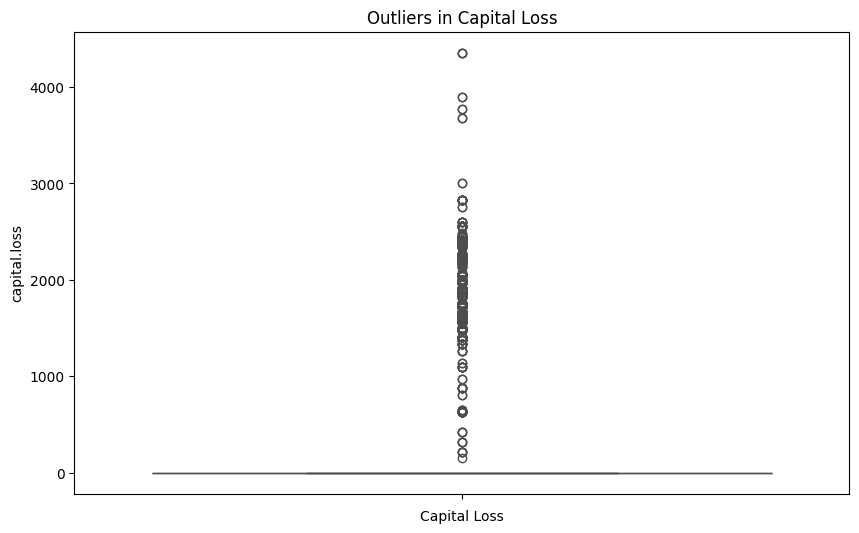

In [35]:
# Outliers in Capital Loss
plt.figure(figsize=(10, 6))
sns.boxplot(df['capital.loss'], color='red')
plt.title('Outliers in Capital Loss')
plt.xlabel('Capital Loss')
plt.show()


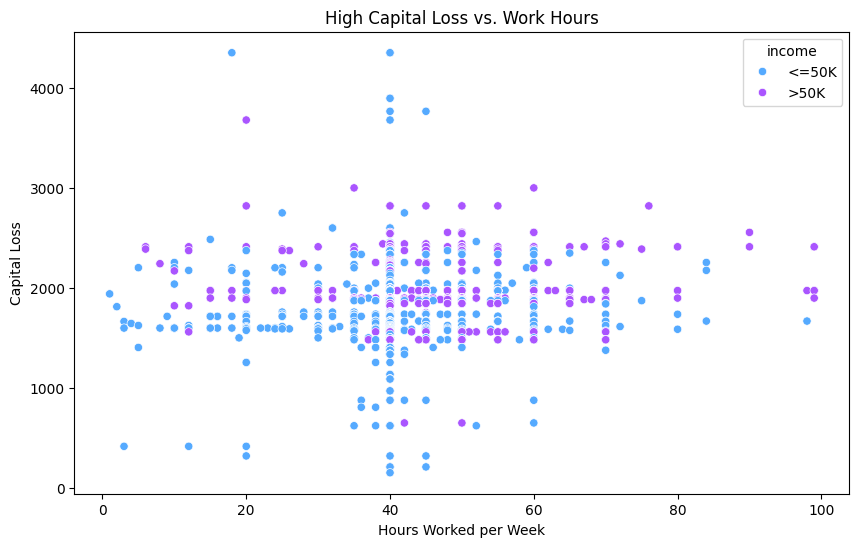

In [37]:
# High Capital Loss vs. Work Hours
high_loss = df[df['capital.loss'] > df['capital.loss'].mean()]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours.per.week', y='capital.loss', data=high_loss, hue='income', palette='cool')
plt.title('High Capital Loss vs. Work Hours')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Capital Loss')
plt.show()


<ipython-input-40-7365664e5eb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='capital.loss', data=df, palette='muted')


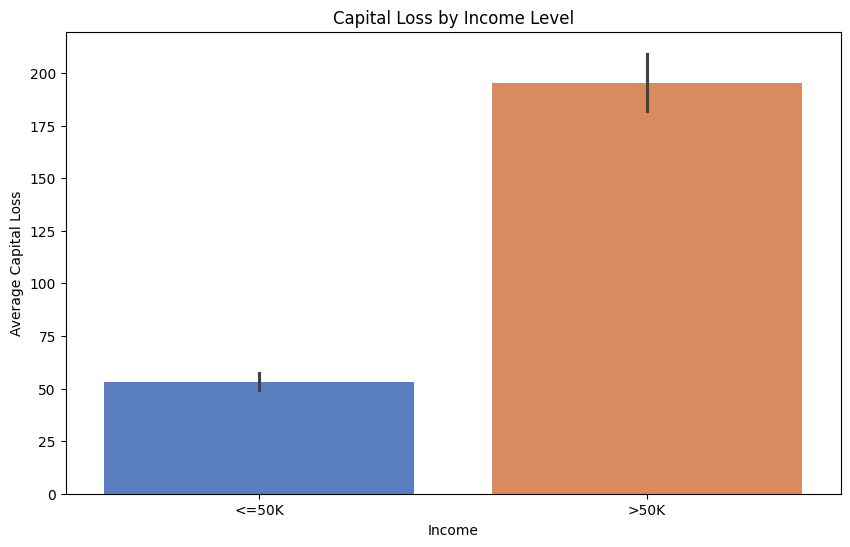

In [40]:
# Capital Loss by Income Level
plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='capital.loss', data=df, palette='muted')
plt.title('Capital Loss by Income Level')
plt.xlabel('Income')
plt.ylabel('Average Capital Loss')
plt.show()


<ipython-input-42-4f0610d72517>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='marital.status', y='hours.per.week', data=df, palette='Set1')


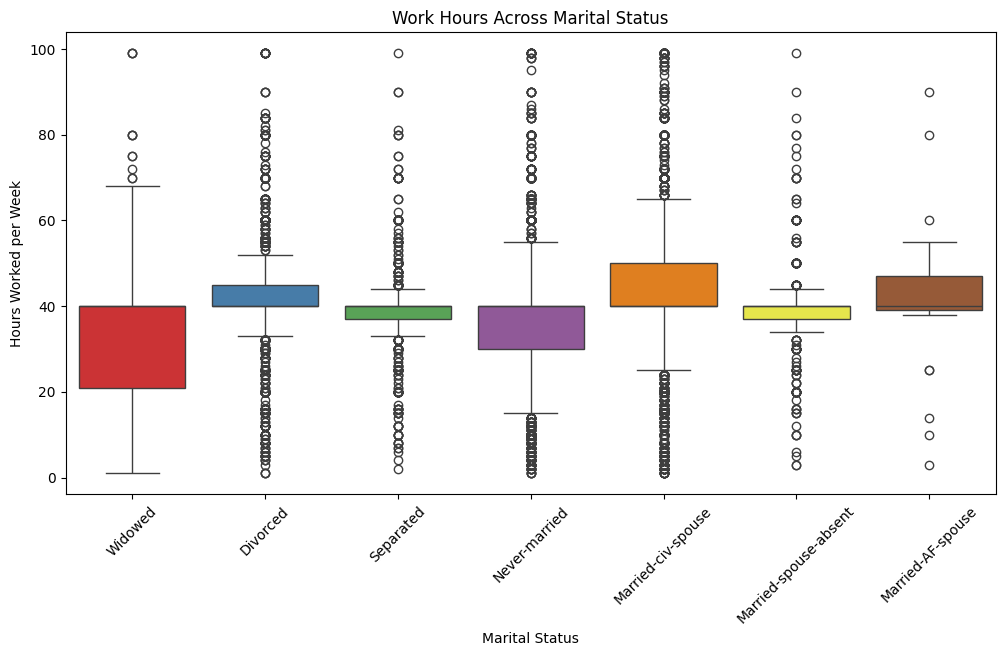

In [42]:
# Work Hours Across Marital Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='marital.status', y='hours.per.week', data=df, palette='Set1')
plt.title('Work Hours Across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Hours Worked per Week')
plt.xticks(rotation=45)
plt.show()


<ipython-input-44-055786307747>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='capital.loss', data=df, palette='Spectral')


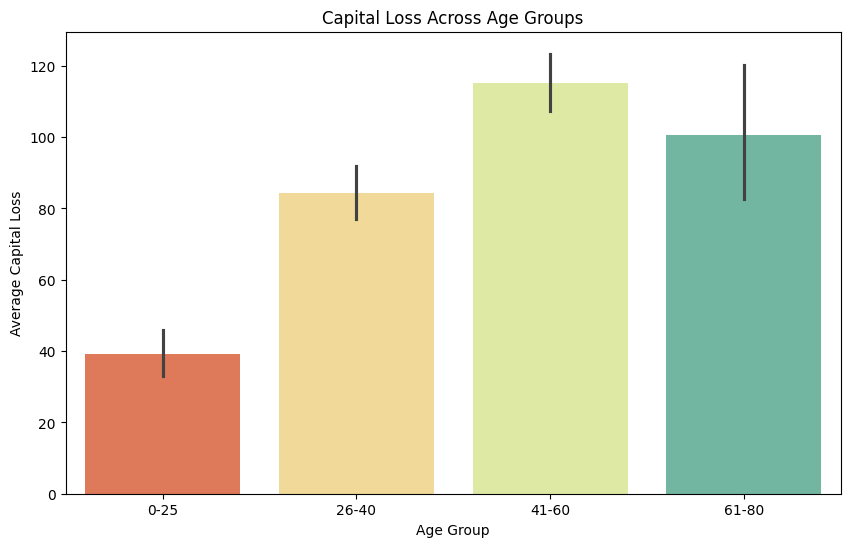

In [44]:
# Capital Loss vs. Age Groups
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 60, 80], labels=['0-25', '26-40', '41-60', '61-80'])
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='capital.loss', data=df, palette='Spectral')
plt.title('Capital Loss Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Capital Loss')
plt.show()


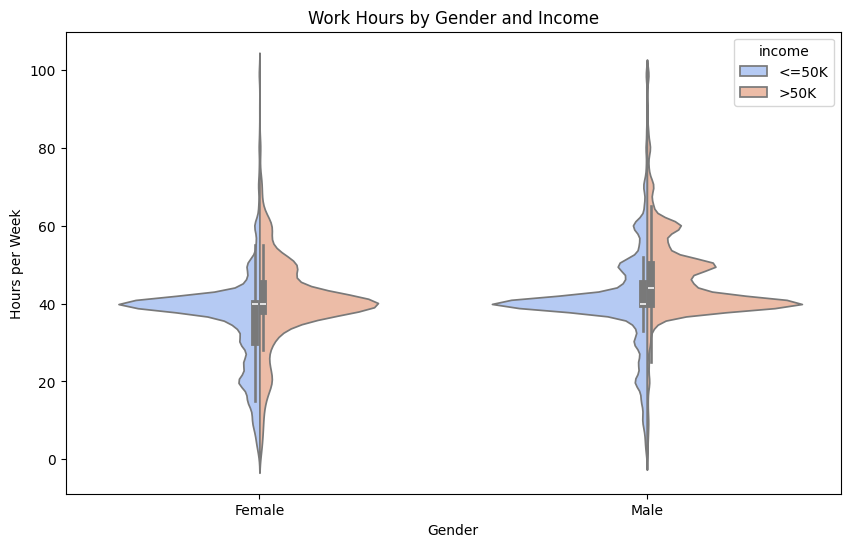

In [46]:
# Work Hours by Gender and Income
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='hours.per.week', hue='income', split=True, data=df, palette='coolwarm')
plt.title('Work Hours by Gender and Income')
plt.xlabel('Gender')
plt.ylabel('Hours per Week')
plt.show()


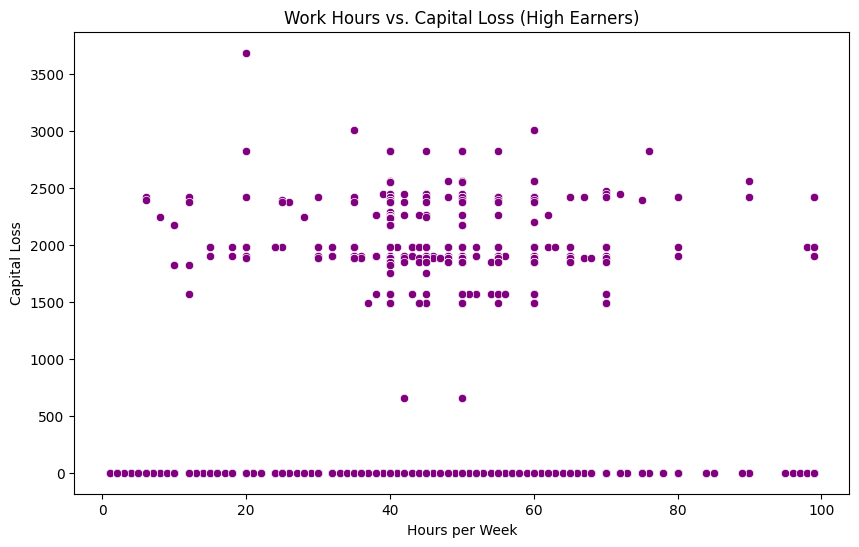

In [48]:
# Work Hours vs. Capital Loss for High Earners
high_income = df[df['income'] == '>50K']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours.per.week', y='capital.loss', data=high_income, color='purple')
plt.title('Work Hours vs. Capital Loss (High Earners)')
plt.xlabel('Hours per Week')
plt.ylabel('Capital Loss')
plt.show()


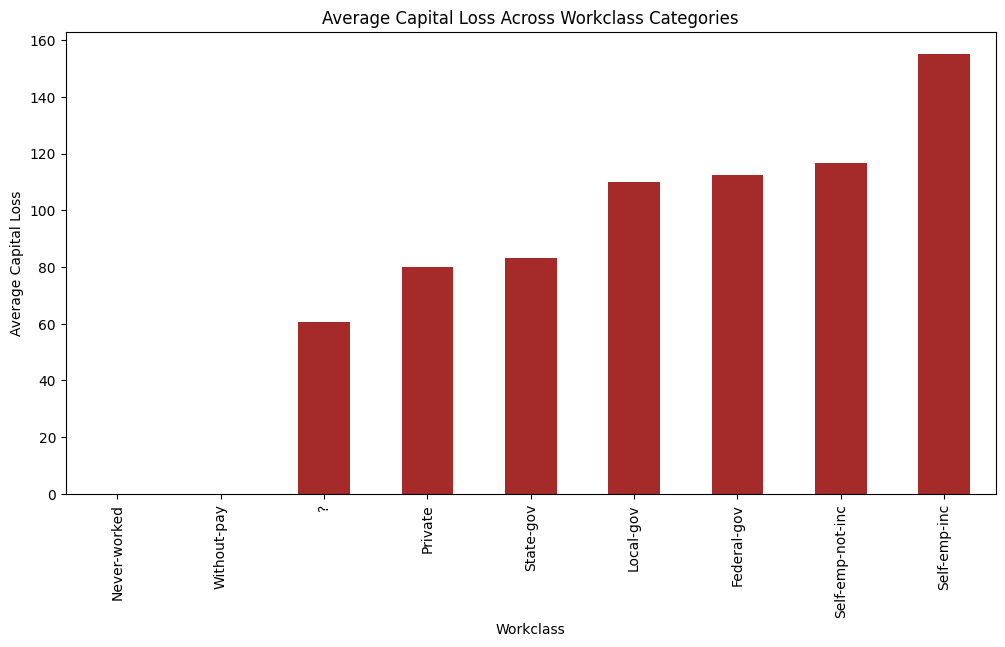

In [50]:
# Capital Loss Across Workclass
plt.figure(figsize=(12, 6))
df.groupby('workclass')['capital.loss'].mean().sort_values().plot(kind='bar', color='brown')
plt.title('Average Capital Loss Across Workclass Categories')
plt.xlabel('Workclass')
plt.ylabel('Average Capital Loss')
plt.show()


<ipython-input-51-d340673c517b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=extreme_loss, palette='viridis')


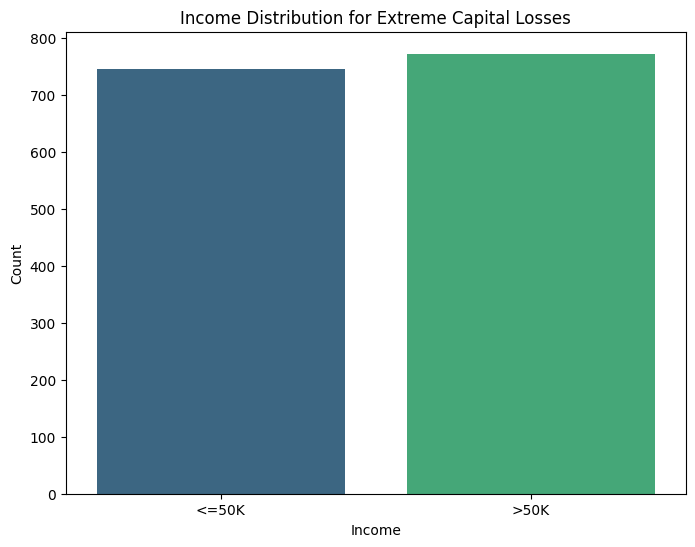

In [51]:
# Income Distribution for Extreme Capital Losses
extreme_loss = df[df['capital.loss'] > df['capital.loss'].quantile(0.95)]
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=extreme_loss, palette='viridis')
plt.title('Income Distribution for Extreme Capital Losses')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()
